<a href="https://colab.research.google.com/github/Calvince1/Cal/blob/main/Customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The main objective in this project is to determine the customers who are at higher risk to discontinue their services with the bank. This is therefore a classification problem

In [ ]:
!pip install pysankey


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from pysankey import sankey

# For the predictive models
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier as GBSklearn
from xgboost import XGBClassifier as XGB
import lightgbm as lgb

# Removing annoying warnings
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [ ]:
churn_df = pd.read_csv("https://raw.githubusercontent.com/Calvince1/Python_Center/main/Bank%20Customer%20Churn%20Prediction%20(1).csv?token=GHSAT0AAAAAACHKMW3WQRX4LMZTSY33PSOSZJSFE7Q")
churn_df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [ ]:
churn_df.isna().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [ ]:
churn_df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
churn_df.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

Comparing Churn customers Vs thos who stayed

In [ ]:
churn = len(churn_df[churn_df['churn'] == 1]['churn'])
not_churn = len(churn_df[churn_df['churn'] == 0]['churn'])
churn_perc = round(churn/len(churn_df)*100,1)
not_churn_perc = round(not_churn/len(churn_df)*100,1)
print("No of customers who left {} ({}%)" .format(churn, churn_perc))
print("No of customers who haven\'t left {} ({}%)" .format(not_churn, not_churn_perc))


No of customers who left 2037 (20.4%)
No of customers who haven't left 7963 (79.6%)


Approximately 20% of customers left the bank while 80% stayed

In [ ]:
country = list(churn_df['country'].unique())
gender = list(churn_df['gender'].unique())

print(country)
print(gender)

['France', 'Spain', 'Germany']
['Female', 'Male']


In [ ]:
churn_df['churn_str'] = churn_df['churn']
churn_df['churn_str'] = churn_df['churn_str'].map({1: 'Exited', 0: 'Stayed'})

In [ ]:
gender_count = churn_df['gender'].value_counts()
gender_pct= gender_count / len(churn_df.index)

gender = pd.concat([gender_count, round(gender_pct,2)], axis=1)\
        .set_axis(['count', 'pct'], axis=1, inplace=False)
gender

<ipython-input-21-dba49d6e6e56>:4: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  gender = pd.concat([gender_count, round(gender_pct,2)], axis=1)\


,count,pct
Male,5457,0.55
Female,4543,0.45


In [ ]:
geo_count = churn_df['country'].value_counts()
geo_pct= geo_count / len(churn_df.index)

geo = pd.concat([geo_count, round(geo_pct,2)], axis=1)\
        .set_axis(['count', 'pct'], axis=1, inplace=False)
geo

<ipython-input-22-8c462dc6f610>:4: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  geo = pd.concat([geo_count, round(geo_pct,2)], axis=1)\


,count,pct
France,5014,0.50
Germany,2509,0.25
Spain,2477,0.25


in the churn survey, there is a higher percentage of male individuals (55%) compared to female individuals (45%). The dataset encompasses only three distinct countries: France, Spain, and Germany. Among these countries, 50% of the customers originate from France, 25% from Germany, and the remaining portion represents customers from Spain.

Relationship between variables and churn

In [ ]:
def count_by_group(data, feature, target):
    df = data.groupby([feature, target])[target].agg(['count'])
    temp = data.groupby([feature])[target].agg(['count'])
    df['pct'] = 100*df.div(temp, level = feature).reset_index()['count'].values
    return df.reset_index()

In [ ]:
count_by_group(churn_df, feature = 'gender', target = 'churn_str')


,gender,churn_str,count,pct
0,Female,Exited,1139,25.071539
1,Female,Stayed,3404,74.928461
2,Male,Exited,898,16.455928
3,Male,Stayed,4559,83.544072


In [ ]:
count_by_group(churn_df, feature = 'country', target = 'churn_str')

,country,churn_str,count,pct
0,France,Exited,810,16.154767
1,France,Stayed,4204,83.845233
2,Germany,Exited,814,32.443204
3,Germany,Stayed,1695,67.556796
4,Spain,Exited,413,16.673395
5,Spain,Stayed,2064,83.326605


In [ ]:
pd.options.display.max_rows = 8
colorDict = {
    'churn':'#f71b1b',
    'Stayed':'grey',
    'Female':'#FFD700',
    'Male':'#8E388E'
}
sankey(
    churn_df['Gender'], churn_df['Exited_str'], aspect=20, colorDict=colorDict,
    fontsize=12, figureName="Gender"
)

In [ ]:
Has_credit_card_count = churn_df['credit_card'].value_counts()
Has_credit_card_pct= Has_credit_card_count / len(churn_df.index)

Has_credit_card = pd.concat([Has_credit_card_count, Has_credit_card_pct], axis=1)\
        .set_axis(['count', 'pct'], axis=1, inplace=False)

Has_credit_card

<ipython-input-36-a7bee62fec7f>:4: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  Has_credit_card = pd.concat([Has_credit_card_count, Has_credit_card_pct], axis=1)\


,count,pct
1,7055,0.7055
0,2945,0.2945


In [ ]:
count_by_group(churn_df, feature = 'credit_card', target = 'churn_str')

,credit_card,churn_str,count,pct
0,0,Exited,613,20.814941
1,0,Stayed,2332,79.185059
2,1,Exited,1424,20.184266
3,1,Stayed,5631,79.815734


In [ ]:
count_by_group(churn_df, feature = 'active_member', target = 'churn_str')

,active_member,churn_str,count,pct
0,0,Exited,1302,26.850897
1,0,Stayed,3547,73.149103
2,1,Exited,735,14.269074
3,1,Stayed,4416,85.730926


In [ ]:
Num_of_Products = churn_df['products_number'].value_counts()
Num_of_Products_pct= Num_of_Products / len(churn_df.index)

Num_Products = pd.concat([Num_of_Products, round(Num_of_Products_pct,2)], axis=1)\
        .set_axis(['count', 'pct'], axis=1, inplace=False)
Num_Products

<ipython-input-44-25932b2929f7>:4: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  Num_Products = pd.concat([Num_of_Products, round(Num_of_Products_pct,2)], axis=1)\


,count,pct
1,5084,0.51
2,4590,0.46
3,266,0.03
4,60,0.01


In [ ]:
count_by_group(churn_df, feature = 'products_number', target = 'churn_str')

,products_number,churn_str,count,pct
0,1,Exited,1409,27.714398
1,1,Stayed,3675,72.285602
2,2,Exited,348,7.581699
3,2,Stayed,4242,92.418301
4,3,Exited,220,82.706767
5,3,Stayed,46,17.293233
6,4,Exited,60,100.000000


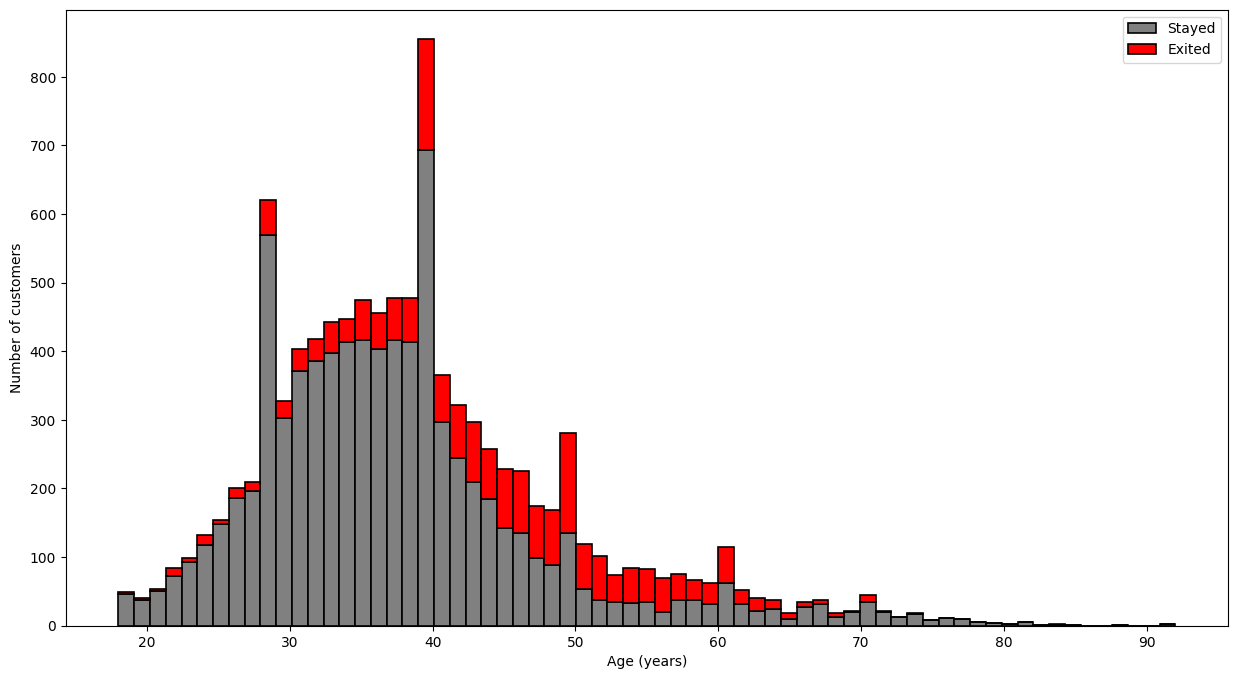

In [ ]:
#Stacked histogram: Age
figure = plt.figure(figsize=(15,8))
plt.hist([
        churn_df[(churn_df.churn==0)]['age'],
        churn_df[(churn_df.churn==1)]['age']
        ],
         stacked=True, color = ['grey','r'],
         bins = 'auto',label = ['Stayed','Exited'],
         edgecolor='black', linewidth=1.2)
plt.xlabel('Age (years)')
plt.ylabel('Number of customers')
plt.legend()

In [ ]:
churn_df.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn', 'churn_str'],
      dtype='object')

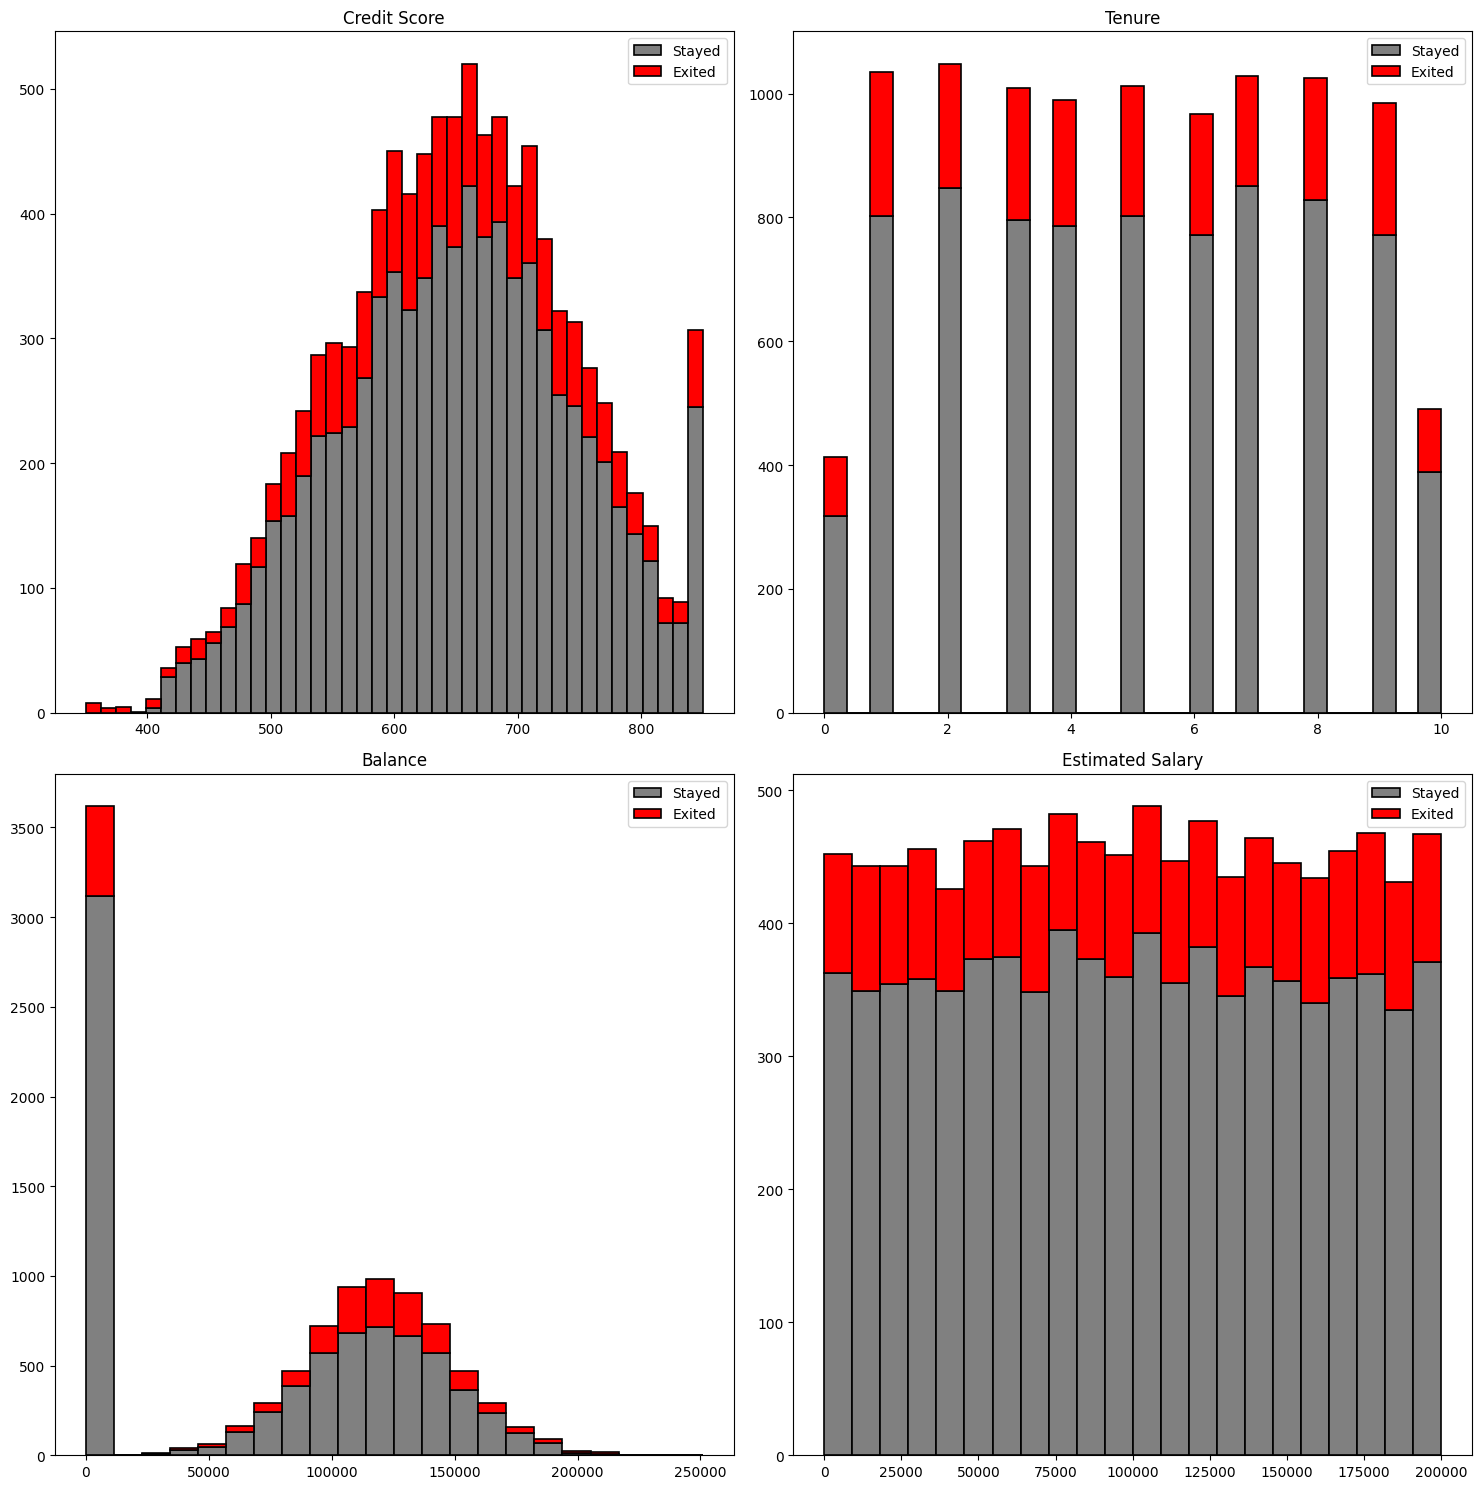

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (15,15))
fig.subplots_adjust(left=0.2, wspace=0.6)
ax0, ax1, ax2, ax3 = axes.flatten()

ax0.hist([
        churn_df[(churn_df.churn==0)]['credit_score'],
        churn_df[(churn_df.churn==1)]['credit_score']
        ],
         stacked=True, color = ['grey','r'],
         bins = 'auto',label = ['Stayed','Exited'],
         edgecolor='black', linewidth=1.2)
ax0.legend()
ax0.set_title('Credit Score')

ax1.hist([
        churn_df[(churn_df.churn==0)]['tenure'],
        churn_df[(churn_df.churn==1)]['tenure']
        ],
         stacked=True, color = ['grey','r'],
         bins = 'auto',label = ['Stayed','Exited'],
         edgecolor='black', linewidth=1.2)
ax1.legend()
ax1.set_title('Tenure')

ax2.hist([
        churn_df[(churn_df.churn==0)]['balance'],
        churn_df[(churn_df.churn==1)]['balance']
        ],
         stacked=True, color = ['grey','r'],
         bins = 'auto',label = ['Stayed','Exited'],
         edgecolor='black', linewidth=1.2)
ax2.legend()
ax2.set_title('Balance')

ax3.hist([
        churn_df[(churn_df.churn==0)]['estimated_salary'],
        churn_df[(churn_df.churn==1)]['estimated_salary']
        ],
         stacked=True, color = ['grey','r'],
         bins = 'auto',label = ['Stayed','Exited'],
         edgecolor='black', linewidth=1.2)
ax3.legend()
ax3.set_title('Estimated Salary')

fig.tight_layout()
plt.show()

**insights drwan from Exploratory Data Analysis**

1. As for gender, women are lower in number than the men, but have a higher rate to close the account.
2. There is a higher rate of exited clients in Germany (32%, which is about 2x higher), and lower in Spain and France (around 16% each).
3. On age, customer bellow 40 and above 65 years old have a tendency to keep their account.
4. Has or not credit card does not impact on the decision to stay in the bank (both groups has 20% of exited customers)
5. Non active members tend to discontinue their services with a bank compared with the active clients (27% vs 14%).
6. The dataset has 96% of clients with 1 or 2 product, and customers with 1 product only have a higher rate to to close the account than those with 2 products (around 3x higher).
7. Estimated Salary does not seem to affect the churn rate

**MODELLING**

Data Splitting into subsets

*   Data Splitting into subsets 80% training and 20% testing

Models to be tested in this project:

*   Logistic Regresstion
*   Multi Layers Perceptron - MLP
*   XGBoost
*   XGB: Gradient Boosting Classifier
*   Light GBM
*   Random Forest  




In [ ]:
#Label Encoding

# List of categorical columns to be label encoded
list_cat = ['country', 'gender']

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for col in list_cat:
    churn_df[col] = label_encoder.fit_transform(churn_df[col])

# Now your categorical columns are label encoded
churn_df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,churn_str
0,15634602,619,0,0,42,2,0.00,1,1,1,101348.88,1,Exited
1,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0,Stayed
2,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57,1,Exited
3,15701354,699,0,0,39,1,0.00,2,0,0,93826.63,0,Stayed
4,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0,Stayed


In [ ]:
churn_df.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn', 'churn_str'],
      dtype='object')

In [ ]:
churn_m= churn_df[['credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn']]
churn_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   country           10000 non-null  int64  
 2   gender            10000 non-null  int64  
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   products_number   10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 859.5 KB


In [ ]:
# Splitting the dataset into 80% as training and 20% as testing.
X = list(churn_m.drop('churn', axis = 1))
y = 'churn'
train, test = train_test_split(churn_m, test_size = 0.2, random_state = 1)

In [ ]:
print('Number of clients in the dataset: {}'.format(len(churn_m)))
print('Number of clients in the train set: {}'.format(len(train)))
print('Number of clients in the test set: {}'.format(len(test)))

Number of clients in the dataset: 10000
Number of clients in the train set: 8000
Number of clients in the test set: 2000


In [ ]:
exited_train = len(train[train['churn'] == 1]['churn'])
exited_train_perc = round(exited_train/len(train)*100,1)

exited_test = len(test[test['churn'] == 1]['churn'])
exited_test_perc = round(exited_test/len(test)*100,1)

print('Complete Train set - Number of clients that have exited the program: {} ({}%)'.format(exited_train, exited_train_perc))
print('Test set - Number of clients that haven\'t exited the program: {} ({}%)'.format(exited_test, exited_test_perc))

Complete Train set - Number of clients that have exited the program: 1622 (20.3%)
Test set - Number of clients that haven't exited the program: 415 (20.8%)


Feature Scaling

In [ ]:
scaler = StandardScaler()

# fit on training set
train[X] = scaler.fit_transform(train[X])

# only transform on test set
test[X] = scaler.transform(test[X])

Complete Training Set

In [ ]:
#LOGISTIC REGRESSION
# Logistic Regression TO search for the best parameters using the GridSearchCV function:
parameters = {'C': [0.01, 0.1, 1, 10],
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'max_iter': [50, 100, 150]}
LR = LogisticRegression(penalty = 'l2')
model_LR = GridSearchCV(LR, parameters, cv = 5, n_jobs = 10, verbose = 1).fit(train[X], train[y])
pd.DataFrame(model_LR.cv_results_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_max_iter,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.170822,0.053268,0.021307,0.007862,0.01,50,newton-cg,"{'C': 0.01, 'max_iter': 50, 'solver': 'newton-...",0.814375,0.816875,0.801875,0.802500,0.801875,0.807500,0.006685,46
1,0.090471,0.019110,0.019065,0.003804,0.01,50,lbfgs,"{'C': 0.01, 'max_iter': 50, 'solver': 'lbfgs'}",0.814375,0.816875,0.801875,0.802500,0.801875,0.807500,0.006685,46
2,0.089451,0.011090,0.026507,0.008347,0.01,50,liblinear,"{'C': 0.01, 'max_iter': 50, 'solver': 'libline...",0.815000,0.816875,0.801250,0.799375,0.800000,0.806500,0.007752,58
3,0.283099,0.017120,0.020580,0.002095,0.01,50,sag,"{'C': 0.01, 'max_iter': 50, 'solver': 'sag'}",0.814375,0.816875,0.801875,0.802500,0.801875,0.807500,0.006685,46
4,0.325700,0.063662,0.017429,0.003129,0.01,50,saga,"{'C': 0.01, 'max_iter': 50, 'solver': 'saga'}",0.814375,0.816875,0.801875,0.802500,0.801875,0.807500,0.006685,46
5,0.277227,0.044143,0.025994,0.009899,0.01,100,newton-cg,"{'C': 0.01, 'max_iter': 100, 'solver': 'newton...",0.814375,0.816875,0.801875,0.802500,0.801875,0.807500,0.006685,46
6,0.129968,0.018386,0.025943,0.010604,0.01,100,lbfgs,"{'C': 0.01, 'max_iter': 100, 'solver': 'lbfgs'}",0.814375,0.816875,0.801875,0.802500,0.801875,0.807500,0.006685,46
7,0.134361,0.012987,0.034096,0.010658,0.01,100,liblinear,"{'C': 0.01, 'max_iter': 100, 'solver': 'liblin...",0.815000,0.816875,0.801250,0.799375,0.800000,0.806500,0.007752,58
8,0.468633,0.019057,0.038874,0.014452,0.01,100,sag,"{'C': 0.01, 'max_iter': 100, 'solver': 'sag'}",0.814375,0.816875,0.801875,0.802500,0.801875,0.807500,0.006685,46
9,0.516209,0.059549,0.028663,0.010366,0.01,100,saga,"{'C': 0.01, 'max_iter': 100, 'solver': 'saga'}",0.814375,0.816875,0.801875,0.802500,0.801875,0.807500,0.006685,46


In [ ]:
print(model_LR.best_params_)

{'C': 1, 'max_iter': 50, 'solver': 'newton-cg'}


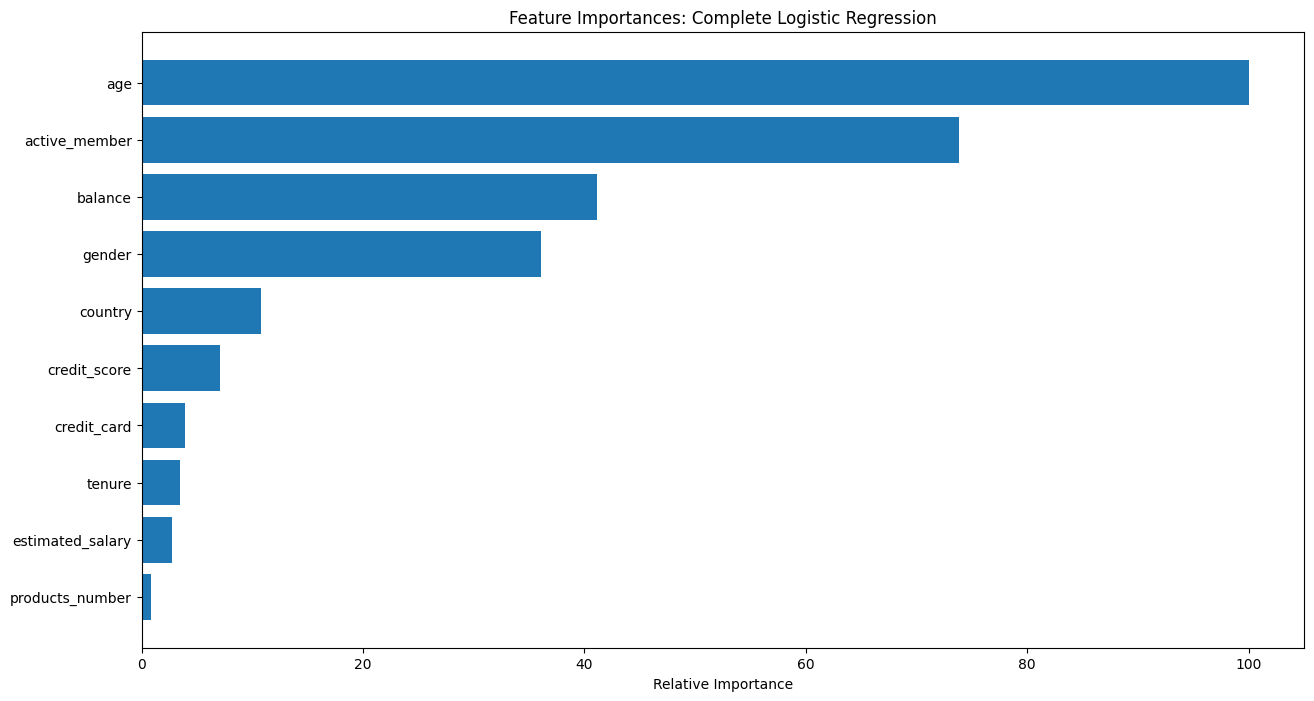

In [ ]:
model = LogisticRegression(**model_LR.best_params_)
model.fit(train[X], train[y])

importances = abs(model.coef_[0])
importances = 100.0 * (importances / importances.max())
indices = np.argsort(importances)

plt.figure(figsize = (15, 8))
plt.title('Feature Importances: Complete Logistic Regression')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [X[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Defining important variables

In [ ]:
def count_by_group(data, X, y):
    df = data.groupby([X, y])[y].agg(['count'])
    temp = data.groupby([X])[y].agg(['count'])
    df['pct'] = 100*df.div(temp, level = X).reset_index()['count'].values
    return df.reset_index()

def classification_report_to_dataframe(true, predictions, predictions_proba, model_name, balanced = 'no'):
    a = classification_report(true, predictions, output_dict = True)
    zeros = pd.DataFrame(data = a['0'], index = [0]).iloc[:,0:3].add_suffix('_0')
    ones = pd.DataFrame(data = a['1'], index = [0]).iloc[:,0:3].add_suffix('_1')
    df = pd.concat([zeros, ones], axis = 1)
    temp = list(df)
    df['Model'] = model_name
    df['Balanced'] = balanced
    df['Accuracy'] = accuracy_score(true, predictions)
    df['Balanced_Accuracy'] = balanced_accuracy_score(true, predictions)
    df['AUC'] = roc_auc_score(true, predictions_proba, average = 'macro')
    df = df[['Model', 'Balanced', 'Accuracy', 'Balanced_Accuracy', 'AUC'] + temp]
    return df

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

Now, let's compute the predictions for the best set of parameters:

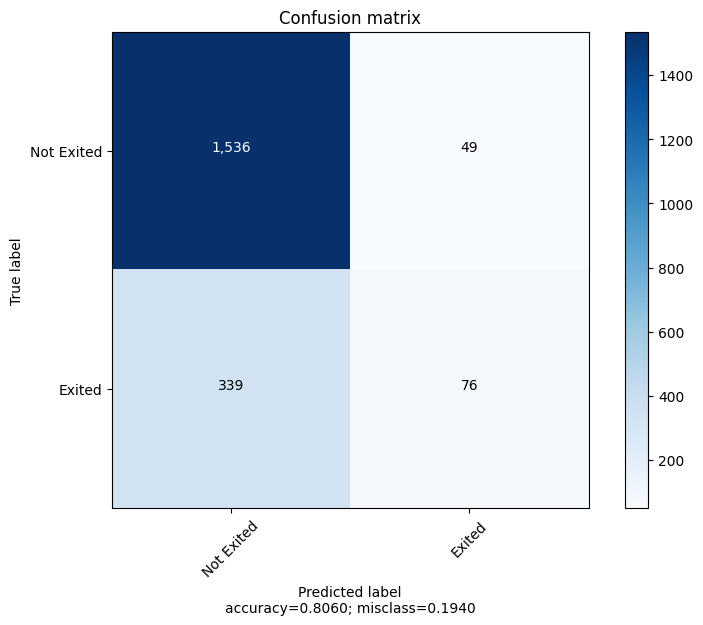

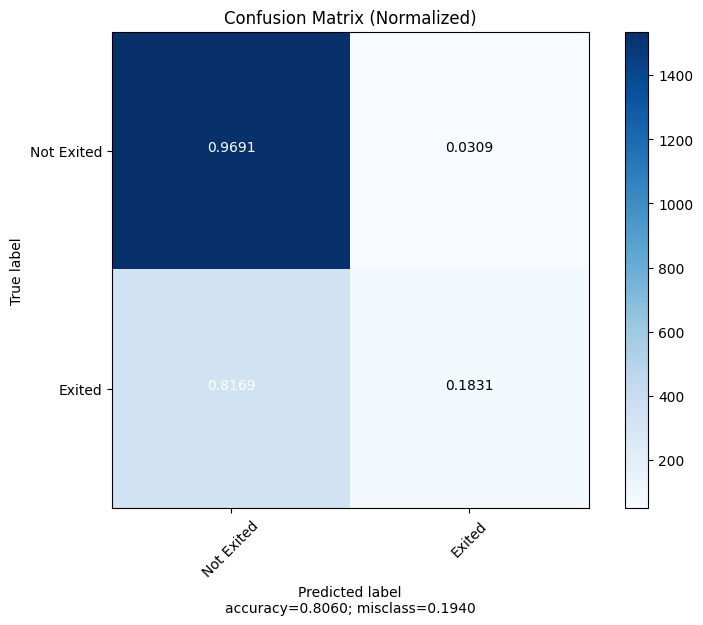

,Model,Balanced,Accuracy,Balanced_Accuracy,AUC,precision_0,recall_0,f1-score_0,precision_1,recall_1,f1-score_1
0,Logistic Regression,no,0.806,0.576109,0.760806,0.8192,0.969085,0.887861,0.608,0.183133,0.281481


In [ ]:
pred = model_LR.predict(test[X])
predp = model_LR.predict_proba(test[X])[:,1]

cm = confusion_matrix(test[y], pred)
plot_confusion_matrix(cm, target_names = ['Not Exited', 'Exited'], normalize = False)
plot_confusion_matrix(cm, target_names = ['Not Exited', 'Exited'], normalize = True, title = 'Confusion Matrix (Normalized)')

table_of_models = classification_report_to_dataframe(test[y], pred, predp, model_name = 'Logistic Regression')
table_of_models

MLP - Multi Layers Perceptron (Neural Networks)

In [ ]:
s = len(X)
parameters = {'hidden_layer_sizes': [(s,),
                                     (s,)*2,
                                     (s,)*4,
                                     (s,)*6],
              'solver': ['lbfgs', 'adam'],
              'alpha': [0, 0.01, 0.1, 1, 10]}
MLP = MLPClassifier()
model_MLP = GridSearchCV(MLP, parameters, cv = 5, n_jobs = 10, verbose = 1).fit(train[X], train[y])
pd.DataFrame(model_MLP.cv_results_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_hidden_layer_sizes,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.376694,0.206102,0.033225,0.014916,0,"(10,)",lbfgs,"{'alpha': 0, 'hidden_layer_sizes': (10,), 'sol...",0.860625,0.861250,0.833750,0.852500,0.848125,0.851250,0.010055,33
1,24.714685,2.979746,0.030855,0.011269,0,"(10,)",adam,"{'alpha': 0, 'hidden_layer_sizes': (10,), 'sol...",0.858750,0.868750,0.846875,0.856875,0.848125,0.855875,0.007951,12
2,9.129542,0.267886,0.021848,0.005655,0,"(10, 10)",lbfgs,"{'alpha': 0, 'hidden_layer_sizes': (10, 10), '...",0.863750,0.859375,0.846875,0.845000,0.851250,0.853250,0.007218,24
3,36.726933,0.823575,0.023046,0.008096,0,"(10, 10)",adam,"{'alpha': 0, 'hidden_layer_sizes': (10, 10), '...",0.861250,0.860000,0.849375,0.862500,0.851250,0.856875,0.005449,9
4,16.268182,0.940482,0.028011,0.003935,0,"(10, 10, 10, 10)",lbfgs,"{'alpha': 0, 'hidden_layer_sizes': (10, 10, 10...",0.856875,0.865000,0.840625,0.860000,0.856250,0.855750,0.008172,13
5,55.481038,0.562504,0.022551,0.005942,0,"(10, 10, 10, 10)",adam,"{'alpha': 0, 'hidden_layer_sizes': (10, 10, 10...",0.861250,0.855625,0.848125,0.858750,0.846875,0.854125,0.005709,22
6,21.957007,0.491611,0.021868,0.016472,0,"(10, 10, 10, 10, 10, 10)",lbfgs,"{'alpha': 0, 'hidden_layer_sizes': (10, 10, 10...",0.847500,0.846250,0.842500,0.860000,0.850000,0.849250,0.005895,34
7,68.455806,4.780765,0.023021,0.005639,0,"(10, 10, 10, 10, 10, 10)",adam,"{'alpha': 0, 'hidden_layer_sizes': (10, 10, 10...",0.858750,0.843750,0.850625,0.855000,0.851250,0.851875,0.005000,30
8,4.465768,0.095908,0.024239,0.008596,0.01,"(10,)",lbfgs,"{'alpha': 0.01, 'hidden_layer_sizes': (10,), '...",0.856250,0.856875,0.853750,0.860625,0.856250,0.856750,0.002215,10
9,26.838327,1.098665,0.023171,0.006898,0.01,"(10,)",adam,"{'alpha': 0.01, 'hidden_layer_sizes': (10,), '...",0.858125,0.864375,0.844375,0.858125,0.850625,0.855125,0.006919,16


In [ ]:
print(model_MLP.best_params_)

{'alpha': 0.1, 'hidden_layer_sizes': (10,), 'solver': 'lbfgs'}


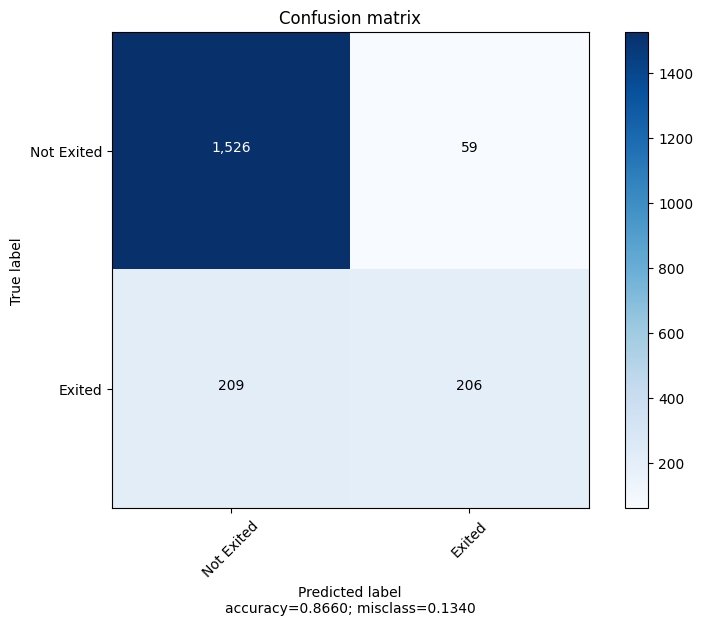

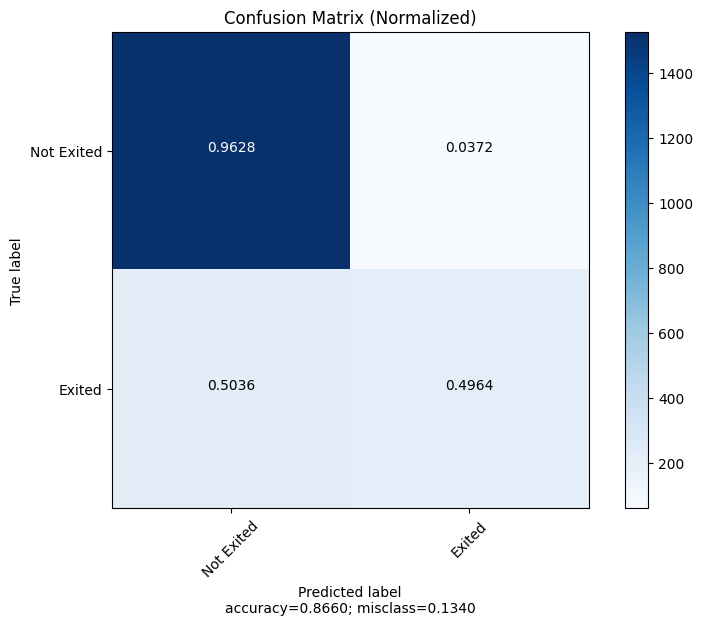

,Model,Balanced,Accuracy,Balanced_Accuracy,AUC,precision_0,recall_0,f1-score_0,precision_1,recall_1,f1-score_1
0,Multi-Layer Perceptron (MLP),no,0.866,0.729581,0.872745,0.879539,0.962776,0.919277,0.777358,0.496386,0.605882


In [ ]:
pred = model_MLP.predict(test[X])
predp = model_MLP.predict_proba(test[X])[:,1]

cm = confusion_matrix(test[y], pred)
plot_confusion_matrix(cm, target_names = ['Not Exited', 'Exited'], normalize = False)
plot_confusion_matrix(cm, target_names = ['Not Exited', 'Exited'], normalize = True, title = 'Confusion Matrix (Normalized)')

temp = classification_report_to_dataframe(test[y], pred, predp, model_name = 'Multi-Layer Perceptron (MLP)')
temp

In [ ]:
table_of_models = table_of_models.append(temp)
table_of_models

<ipython-input-84-c1cad58f660f>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_of_models = table_of_models.append(temp)


,Model,Balanced,Accuracy,Balanced_Accuracy,AUC,precision_0,recall_0,f1-score_0,precision_1,recall_1,f1-score_1
0,Logistic Regression,no,0.806,0.576109,0.760806,0.819200,0.969085,0.887861,0.608000,0.183133,0.281481
0,Multi-Layer Perceptron (MLP),no,0.866,0.729581,0.872745,0.879539,0.962776,0.919277,0.777358,0.496386,0.605882


**Gradient Boosting Classifier**

In [ ]:
parameters = {'max_depth': [2, 3, 4, 6, 10, 15],
              'n_estimators': [50, 100, 300, 500]}
GB = GBSklearn()
model_GB = GridSearchCV(GB, parameters, cv = 5, n_jobs = 10, verbose = 1).fit(train[X], train[y])
pd.DataFrame(model_GB.cv_results_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.736661,0.224118,0.037390,0.012274,2,50,"{'max_depth': 2, 'n_estimators': 50}",0.867500,0.855000,0.850625,0.857500,0.851250,0.856375,0.006103,11
1,6.098468,0.349183,0.073256,0.020061,2,100,"{'max_depth': 2, 'n_estimators': 100}",0.872500,0.861250,0.850000,0.859375,0.858750,0.860375,0.007198,6
2,21.509836,0.422089,0.085613,0.012623,2,300,"{'max_depth': 2, 'n_estimators': 300}",0.874375,0.864375,0.853125,0.862500,0.856875,0.862250,0.007263,2
3,40.229669,0.759647,0.119510,0.021199,2,500,"{'max_depth': 2, 'n_estimators': 500}",0.871250,0.861250,0.853750,0.860625,0.856875,0.860750,0.005908,4
4,5.064112,0.137504,0.048937,0.009826,3,50,"{'max_depth': 3, 'n_estimators': 50}",0.868750,0.856875,0.853750,0.858125,0.852500,0.858000,0.005747,8
5,11.982882,0.091289,0.058457,0.004487,3,100,"{'max_depth': 3, 'n_estimators': 100}",0.873125,0.864375,0.853125,0.863750,0.856875,0.862250,0.006887,1
6,32.066077,0.389227,0.102666,0.007789,3,300,"{'max_depth': 3, 'n_estimators': 300}",0.873125,0.860000,0.854375,0.856875,0.856875,0.860250,0.006680,7
7,52.619630,0.595356,0.097272,0.017819,3,500,"{'max_depth': 3, 'n_estimators': 500}",0.866875,0.856250,0.852500,0.856250,0.851875,0.856750,0.005382,10
8,8.864340,0.103582,0.051543,0.012228,4,50,"{'max_depth': 4, 'n_estimators': 50}",0.873750,0.861875,0.851250,0.864375,0.853750,0.861000,0.008029,3
9,12.808429,0.489138,0.043462,0.015015,4,100,"{'max_depth': 4, 'n_estimators': 100}",0.871250,0.861875,0.850000,0.862500,0.857500,0.860625,0.006937,5


In [ ]:
print(model_GB.best_params_)

{'max_depth': 3, 'n_estimators': 100}


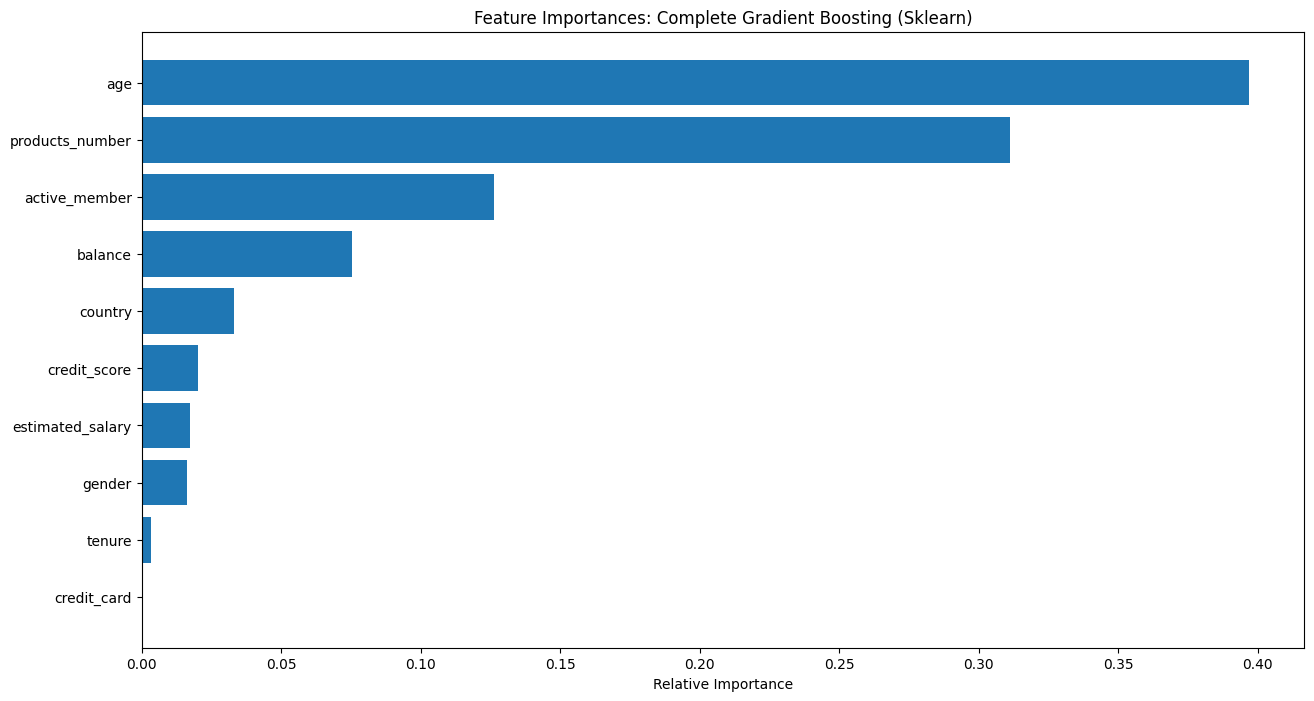

In [ ]:
model = GBSklearn(**model_GB.best_params_)
model.fit(train[X], train[y])

importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize = (15, 8))
plt.title('Feature Importances: Complete Gradient Boosting (Sklearn)')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [X[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

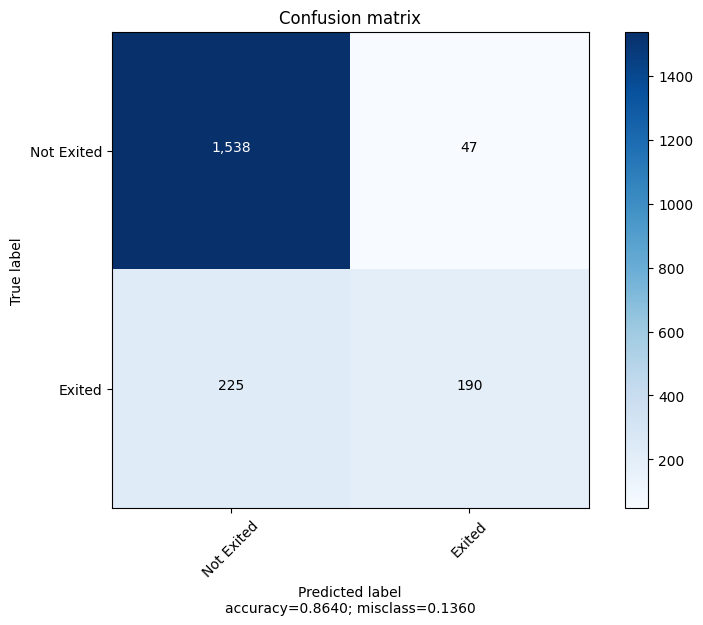

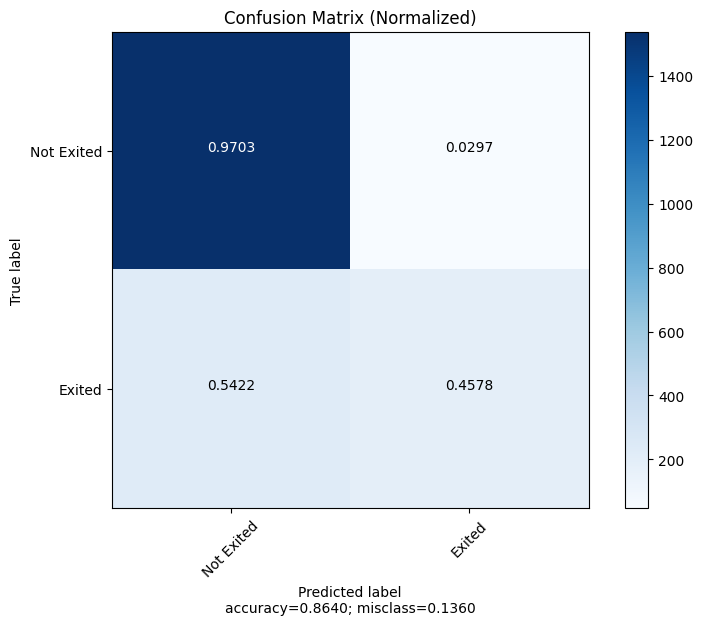

,Model,Balanced,Accuracy,Balanced_Accuracy,AUC,precision_0,recall_0,f1-score_0,precision_1,recall_1,f1-score_1
0,Gradient Boosting (Sklearn),no,0.864,0.714089,0.877134,0.872377,0.970347,0.918757,0.801688,0.457831,0.582822


In [ ]:
pred = model_GB.predict(test[X])
predp = model_GB.predict_proba(test[X])[:,1]

cm = confusion_matrix(test[y], pred)
plot_confusion_matrix(cm, target_names = ['Not Exited', 'Exited'], normalize = False)
plot_confusion_matrix(cm, target_names = ['Not Exited', 'Exited'], normalize = True, title = 'Confusion Matrix (Normalized)')

temp = classification_report_to_dataframe(test[y], pred, predp, model_name = 'Gradient Boosting (Sklearn)')
temp

**Extreme Gradient Boosing**

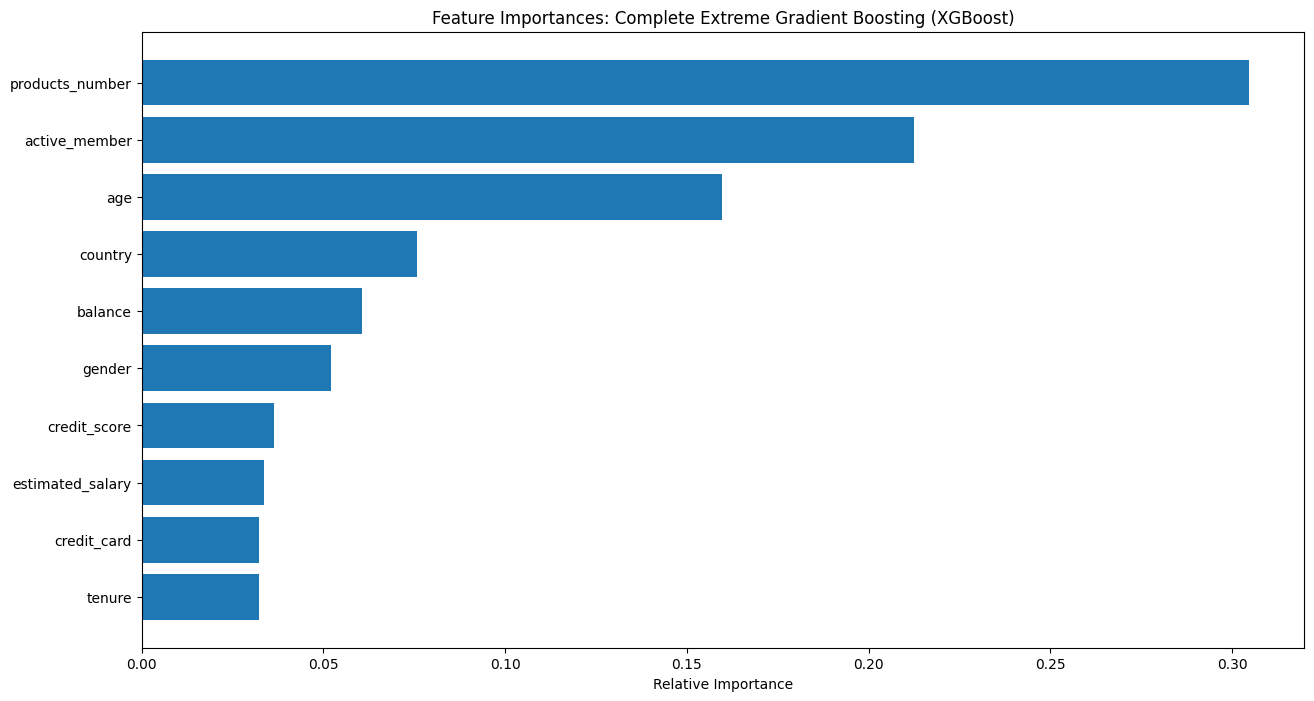

In [ ]:
model_XGB = XGB(max_depth = 6,
            learning_rate = .1,
            n_estimators = 100,
            reg_lambda = 0.5,
            reg_alpha = 0,
            verbosity = 1,
            n_jobs = -1,
            tree_method = 'auto').fit(train[X], train[y])

pred = model_XGB.predict(test[X])
predp = model_XGB.predict_proba(test[X])[:,1]

importances = model_XGB.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize = (15, 8))
plt.title('Feature Importances: Complete Extreme Gradient Boosting (XGBoost)')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [X[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

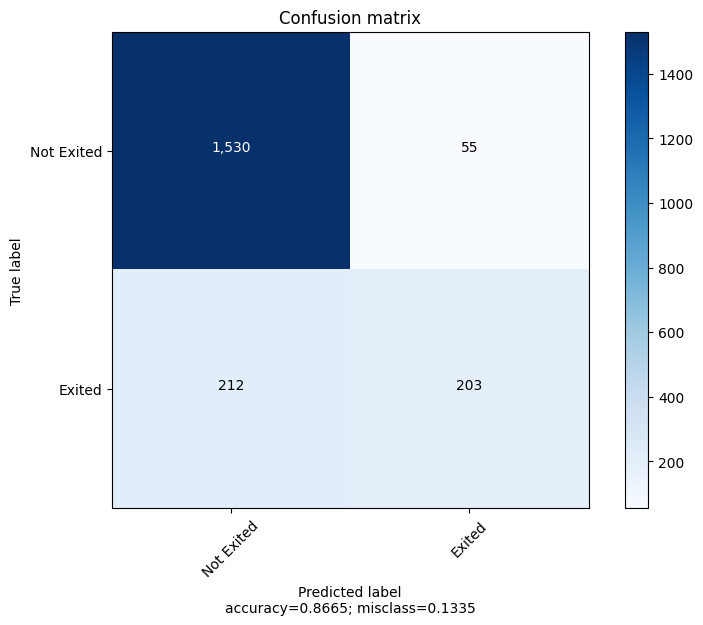

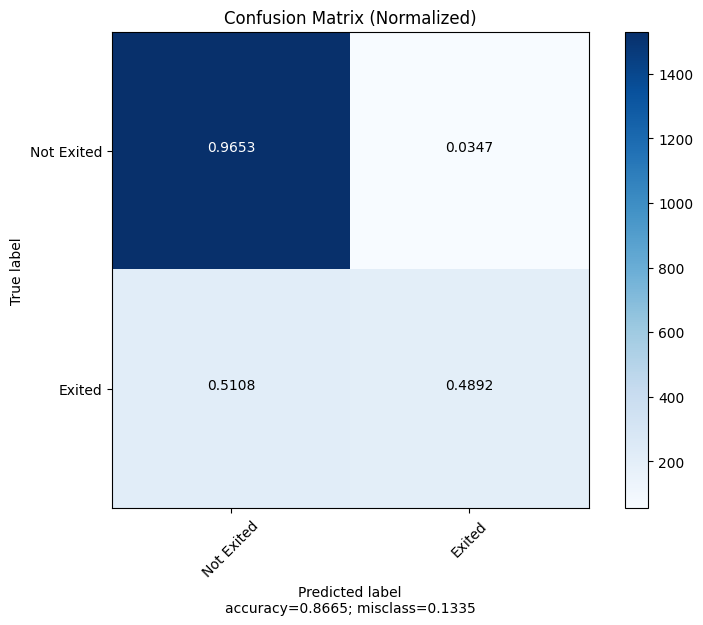

,Model,Balanced,Accuracy,Balanced_Accuracy,AUC,precision_0,recall_0,f1-score_0,precision_1,recall_1,f1-score_1
0,Gradient Boosting (XGBoost),no,0.8665,0.727228,0.875216,0.878301,0.9653,0.919748,0.786822,0.489157,0.603269


In [ ]:
cm = confusion_matrix(test[y], pred)
plot_confusion_matrix(cm, target_names = ['Not Exited', 'Exited'], normalize = False)
plot_confusion_matrix(cm, target_names = ['Not Exited', 'Exited'], normalize = True, title = 'Confusion Matrix (Normalized)')

temp = classification_report_to_dataframe(test[y], pred, predp, model_name = 'Gradient Boosting (XGBoost)')
temp

In [ ]:
table_of_models = table_of_models.append(temp)
table_of_models

<ipython-input-93-c1cad58f660f>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_of_models = table_of_models.append(temp)


,Model,Balanced,Accuracy,Balanced_Accuracy,AUC,precision_0,recall_0,f1-score_0,precision_1,recall_1,f1-score_1
0,Logistic Regression,no,0.8060,0.576109,0.760806,0.819200,0.969085,0.887861,0.608000,0.183133,0.281481
0,Multi-Layer Perceptron (MLP),no,0.8660,0.729581,0.872745,0.879539,0.962776,0.919277,0.777358,0.496386,0.605882
0,Gradient Boosting (XGBoost),no,0.8665,0.727228,0.875216,0.878301,0.965300,0.919748,0.786822,0.489157,0.603269
